Enter the image URL: https://avatars.githubusercontent.com/u/57394564?v=4
Enter the target width (px): 100
Enter the target height (px): 100
Resized image saved as image_20240504160222.jpg


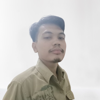

In [19]:
from PIL import Image
import requests
from io import BytesIO
from PIL import UnidentifiedImageError
from IPython.display import display
import datetime

def resize_image(url, target_width, target_height):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))

        width_ratio = target_width / img.width
        height_ratio = target_height / img.height
        min_ratio = min(width_ratio, height_ratio)
        new_width = int(img.width * min_ratio)
        new_height = int(img.height * min_ratio)
        resized_img = img.resize((new_width, new_height))
        return resized_img
    except UnidentifiedImageError:
        print("Failed to identify image file. Please make sure the URL is correct and the file is an image.")
        return None

image_url = input("Enter the image URL: ")
target_width = int(input("Enter the target width (px): "))
target_height = int(input("Enter the target height (px): "))

resized_image = resize_image(image_url, target_width, target_height)

current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
filename = f"image_{current_time}.jpg"

if resized_image:
    resized_image.save(filename)
    print(f"Resized image saved as {filename}")

if resized_image:
    display(resized_image)
